# DeepLabCut Toolbox - Open-Field DEMO
https://github.com/DeepLabCut/DeepLabCut

#### The notebook accompanies the following user-guide:

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species* Nature Protocols, 2019: https://www.nature.com/articles/s41596-019-0176-0

This notebook illustrates how to:
- load the demo project
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories 
- identify outlier frames
- annotate the outlier frames manually
- merge the data sets and update the training set
- train a network

Note: This notebook starts from an already initialized project with labeled data.


The data is a subset from *DeepLabCut: markerless pose estimation of user-defined body parts with deep learning* https://www.nature.com/articles/s41593-018-0209-y (this subset was not used to train models that are shown or evaluated in our paper).

In [1]:
# Importing the toolbox (takes several seconds)
import deeplabcut

Loading DLC 2.2.2...


/Users/jaanita/opt/anaconda3/envs/DEEPLABCUT_M1/lib/python3.7/site-packages/deeplabcut/__init__.py:85: UserWarning: 
        As PyTorch is not installed, unsupervised identity learning will not be available.
        Please run `pip install torch`, or ignore this warning.
        
  """


In [18]:
# Loading example data set:
import os
# Note that parameters of this project can be seen at: *openfield-Pranav-2018-10-30/config.yaml*
from pathlib import Path
#path_config_file = os.path.join(os.getcwd(),'openfield-Pranav-2018-10-30/config.yaml')
home = os.path.expanduser("~")
path_config_file = os.path.join(home,"Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/config.yaml")
deeplabcut.load_demo_data(path_config_file)
#deeplabcut.load_demo_data('home/Documents/GitHub/DeepLabCut/examples/JUPYTER/openfield-Pranav-2018-10-30/config.yaml')


Loaded, now creating training data...
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


In [19]:
#[OPTIONAL] Perhaps plot the labels to see how the frames were annotated:
#(note, this project was created in Linux, so you might have an error in Windows, but this is an optional step)
deeplabcut.check_labels(path_config_file)

Creating images with labels by Pranav.


100%|█████████████████████████████████████████| 116/116 [00:16<00:00,  7.02it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


## Start training of Feature Detectors
This function trains the network for a specific shuffle of the training dataset. The user can set various parameters in */openfield-Pranav-2018-10-30/dlc-models/.../pose_cfg.yaml*. 

Training can be stopped at any time. Note that the weights are only stored every 'save_iters' steps. For this demo the state it is advisable to store & display the progress very often. In practice this is inefficient.  

In [21]:
deeplabcut.train_network(path_config_file, shuffle=1, displayiters=10, saveiters=100)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['snout', 'leftear', 'rightear', 'tailbase'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_openfieldOct30/openfield_Pranav95shuffle1.mat',
 'dataset_type': 'imgaug',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/Users/jaanita/opt/anaconda3/envs/DEEPLABCUT_M1/lib/python3.7/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': F

Selecting single-animal trainer
Batch Size is 1


/Users/jaanita/opt/anaconda3/envs/DEEPLABCUT_M1/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading ImageNet-pretrained resnet_50
Display_iters overwritten as 10
Save_iters overwritten as 100
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/Users/jaanita/Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/dlc-models/iteration-0/openfieldOct30-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': 

iteration: 10 loss: 0.2752 lr: 0.005
iteration: 20 loss: 0.0517 lr: 0.005
iteration: 30 loss: 0.0393 lr: 0.005
iteration: 40 loss: 0.0364 lr: 0.005
iteration: 50 loss: 0.0315 lr: 0.005
iteration: 60 loss: 0.0334 lr: 0.005
iteration: 70 loss: 0.0347 lr: 0.005
iteration: 80 loss: 0.0304 lr: 0.005
iteration: 90 loss: 0.0282 lr: 0.005
iteration: 100 loss: 0.0260 lr: 0.005
iteration: 110 loss: 0.0297 lr: 0.005
iteration: 120 loss: 0.0280 lr: 0.005
iteration: 130 loss: 0.0251 lr: 0.005
iteration: 140 loss: 0.0278 lr: 0.005
iteration: 150 loss: 0.0250 lr: 0.005
iteration: 160 loss: 0.0248 lr: 0.005
iteration: 170 loss: 0.0255 lr: 0.005
iteration: 180 loss: 0.0196 lr: 0.005
iteration: 190 loss: 0.0239 lr: 0.005
iteration: 200 loss: 0.0237 lr: 0.005
iteration: 210 loss: 0.0273 lr: 0.005
iteration: 220 loss: 0.0245 lr: 0.005
iteration: 230 loss: 0.0283 lr: 0.005
iteration: 240 loss: 0.0224 lr: 0.005
iteration: 250 loss: 0.0218 lr: 0.005
iteration: 260 loss: 0.0217 lr: 0.005
iteration: 270 loss: 

KeyboardInterrupt: 

**Note, that if it reaches the end or you stop it (by hitting "stop" or by CTRL+C), 
you will see an "KeyboardInterrupt" error, but you can ignore this!**

## Evaluate a trained network

This function evaluates a trained model for a specific shuffle/shuffles at a particular training state (snapshot) or on all the states. The network is evaluated on the data set (images) and stores the results as .csv file in a subdirectory under **evaluation-results**.

You can change various parameters in the ```config.yaml``` file of this project. For evaluation all the model descriptors (Task, TrainingFraction, Date etc.) are important. For the evaluation one can change pcutoff. This cutoff also influences how likely estimated positions need to be so that they are shown in the plots. One can furthermore, change the colormap and dotsize for those graphs.

In [22]:
deeplabcut.evaluate_network(path_config_file,plotting=False)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['snout', 'leftear', 'rightear', 'tailbase'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_openfieldOct30/openfield_Pranav95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/Users/jaanita/opt/anaconda3/envs/DEEPLABCUT_M1/lib/python3.7/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 4,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False,
 'partaffinityfield_predict': False,
 'regularize': False,
 'scoremap_dir': 'test',
 'shu

Running  DLC_resnet50_openfieldOct30shuffle1_1000  with # of training iterations: 1000
Running evaluation ...


116it [01:07,  1.72it/s]

Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-1000
Results for 1000  training iterations: 95 1 train error: 10.09 pixels. Test error: 18.87  pixels.
With pcutoff of 0.4  train error: 9.46 pixels. Test error: 18.75 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


*NOTE: depending on your set up sometimes you get some "matplotlib errors, but these are not important*

Now you can go check out the images. Given the limited data input and it took ~20 mins to test this out, it is not meant to track well, so don't be alarmed. This is just to get you familiar with the workflow... 

## Analyzing videos
This function extracts the pose based on a trained network from videos. The user can choose the trained network - by default the most recent snapshot is used to analyse the videos. However, the user can also specify the snapshot index for the variable **snapshotindex** in the **config.yaml** file).

The results are stored in hd5 file in the same directory, where the video resides. The pose array (pose vs. frame index) can also be exported as csv file (set flag to...). 

In [25]:
# Creating video path:
import os
videofile_path = os.path.join(home,"Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4")

#videofile_path = os.path.join(os.getcwd(),'openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4')

In [26]:
print("Start analyzing the video!")
#our demo video on a CPU with take ~30 min to analze! GPU is much faster!
deeplabcut.analyze_videos(path_config_file,[videofile_path])

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['snout', 'leftear', 'rightear', 'tailbase'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_openfieldOct30/openfield_Pranav95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/Users/jaanita/opt/anaconda3/envs/DEEPLABCUT_M1/lib/python3.7/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 4,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False,
 'partaffinityfield_predict': False,
 'regularize': False,
 'scoremap_dir': 'test',
 'shu

Start analyzing the video!
Using snapshot-1000 for model /Users/jaanita/Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/dlc-models/iteration-0/openfieldOct30-trainset95shuffle1
Starting to analyze %  /Users/jaanita/Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4
Loading  /Users/jaanita/Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4
Duration of video [s]:  77.67 , recorded with  30.0 fps!
Overall # of frames:  2330  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████████████████████████████████▉| 2323/2330 [18:15<00:03,  2.12it/s]

Saving results in /Users/jaanita/Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_openfieldOct30shuffle1_1000'

## Create labeled video

This function is for the visualization purpose and can be used to create a video in .mp4 format with the predicted labels. This video is saved in the same directory, where the (unlabeled) video resides. 

Various parameters can be set with regard to the colormap and the dotsize. The parameters of the 

In [27]:
deeplabcut.create_labeled_video(path_config_file,[videofile_path])

Starting to process video: /Users/jaanita/Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4
Loading /Users/jaanita/Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4 and data.
Duration of video [s]: 77.67, recorded with 30.0 fps!
Overall # of frames: 2330 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████████████████████████████████| 2330/2330 [00:06<00:00, 368.26it/s]


## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color. The underlying functions can easily be customized.

Loading  /Users/jaanita/Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4 and data.


<IPython.core.display.Javascript object>


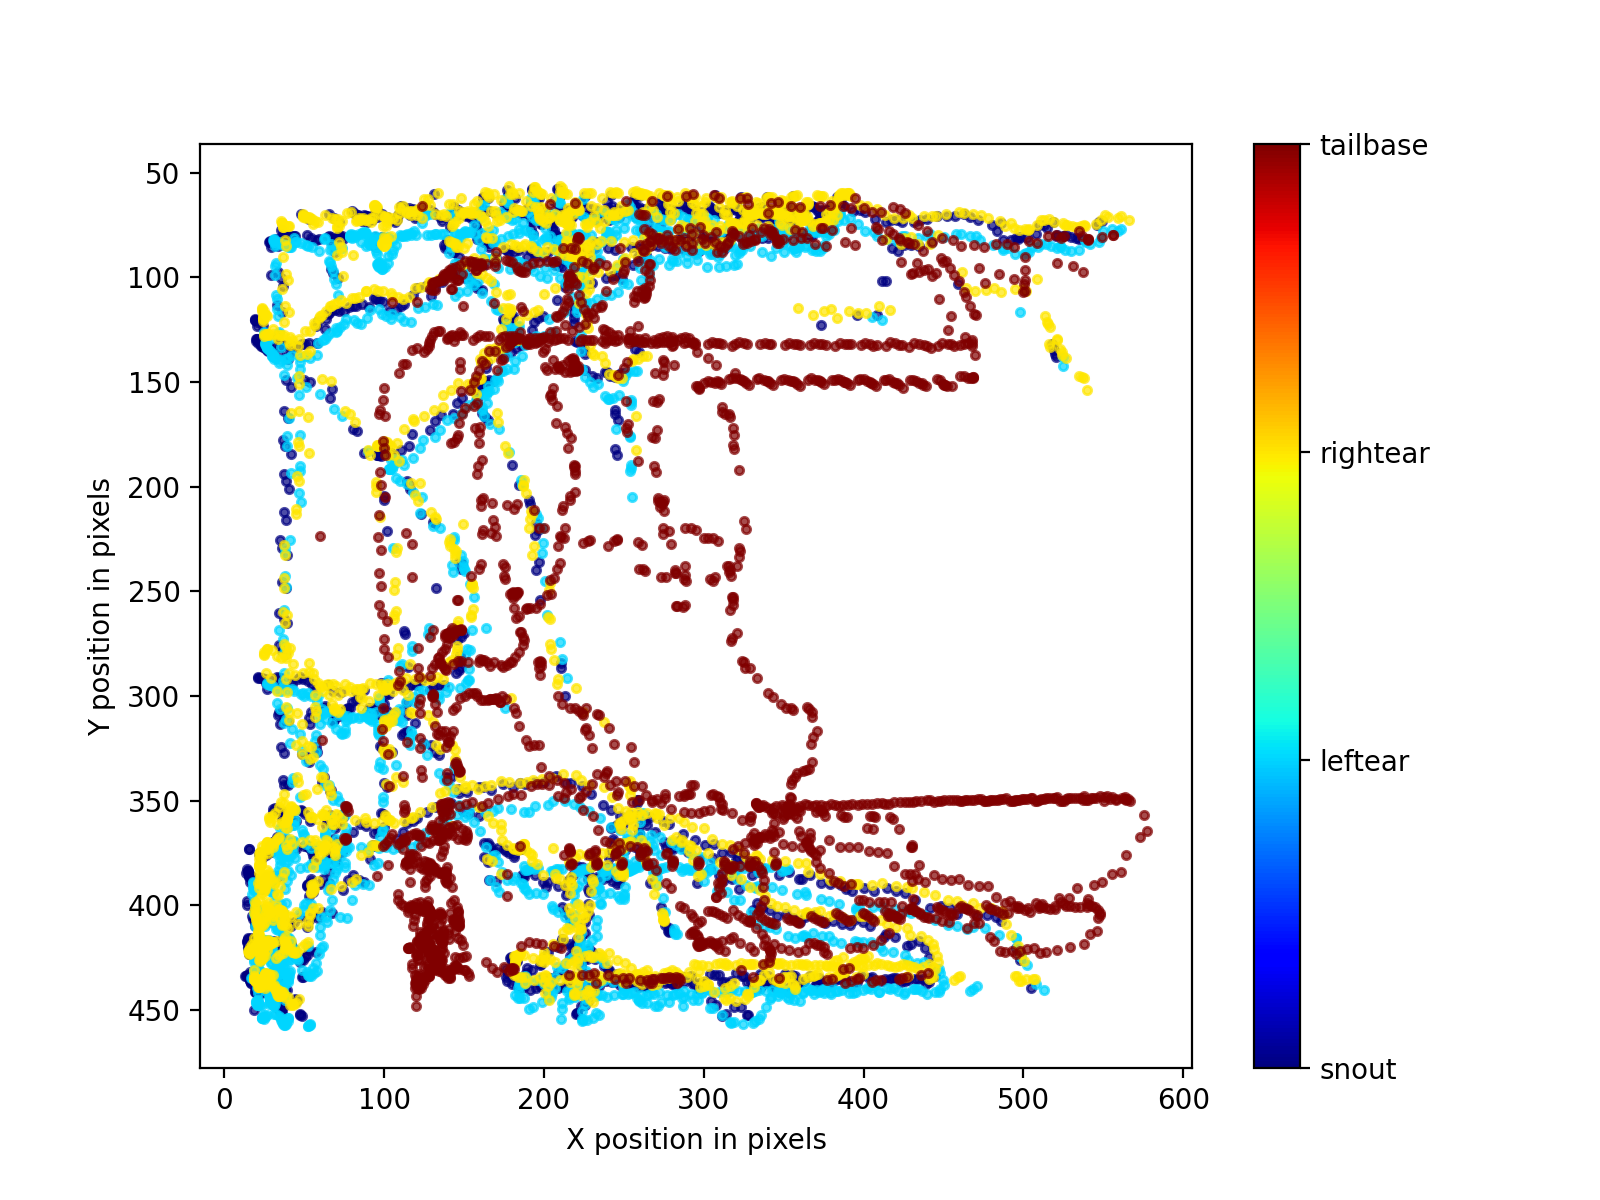

<IPython.core.display.Javascript object>


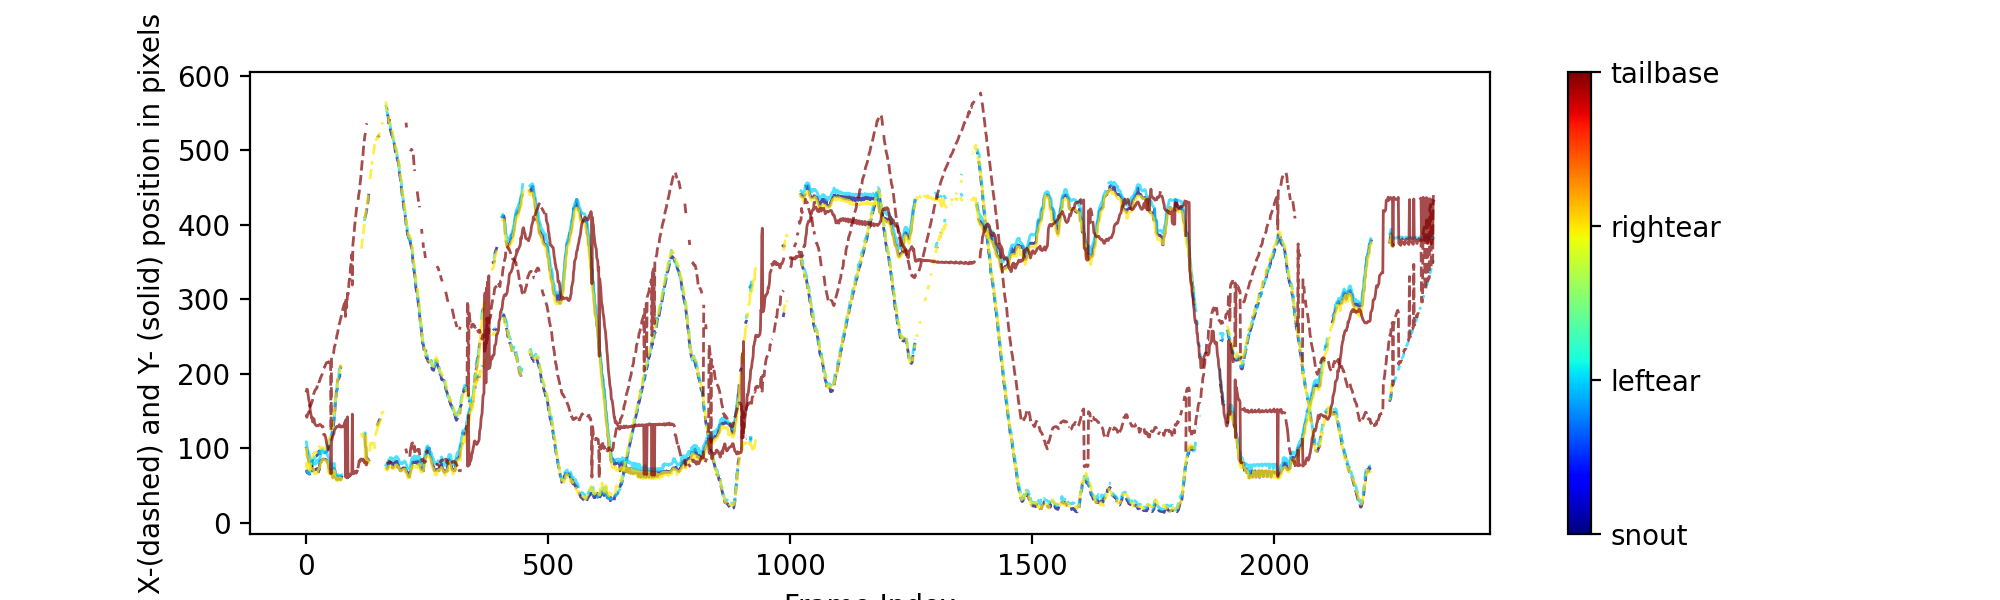

<IPython.core.display.Javascript object>


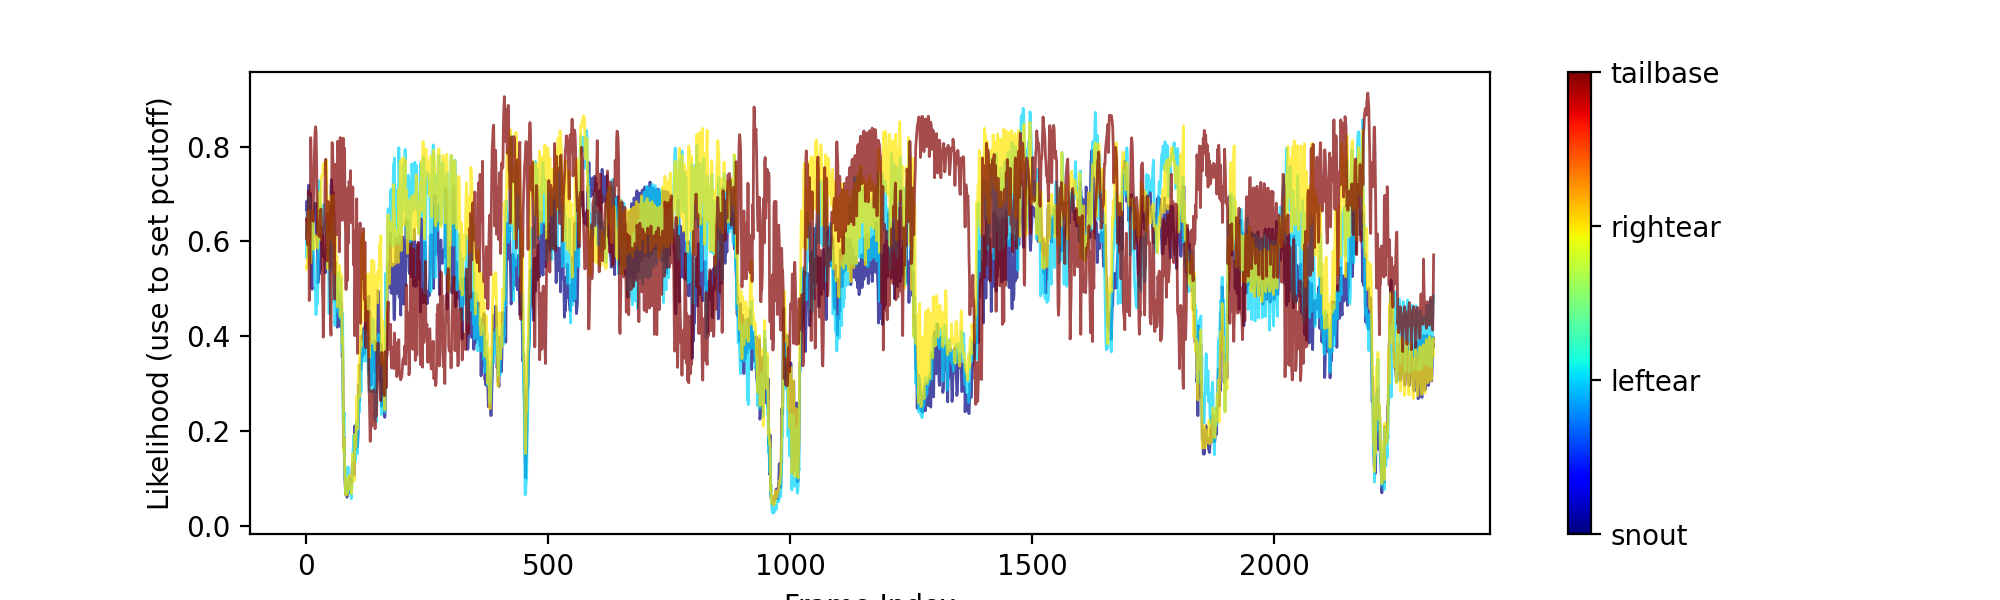

<IPython.core.display.Javascript object>


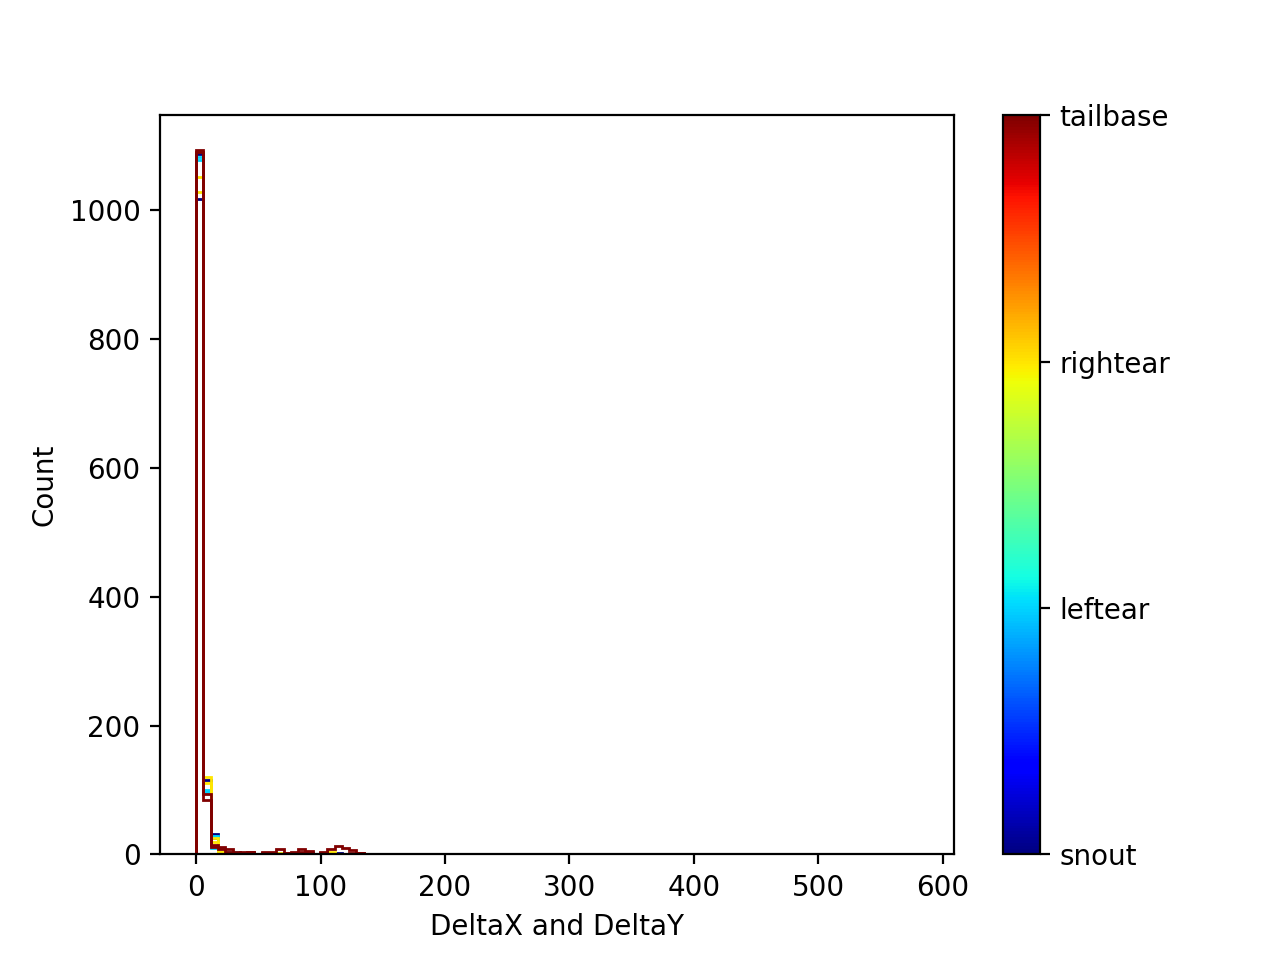

Plots created! Please check the directory "plot-poses" within the video directory


In [28]:
%matplotlib notebook
deeplabcut.plot_trajectories(path_config_file,[videofile_path],showfigures=True)

#These plots can are interactive and can be customized (see https://matplotlib.org/)

## Extract outlier frames, where the predictions are off.

This is optional step allows to add more training data when the evaluation results are poor. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

/Users/jaanita/opt/anaconda3/envs/DEEPLABCUT_M1/lib/python3.7/site-packages/deeplabcut/refine_training_dataset/outlier_frames.py:401: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  sum_ = temp_dt.sum(axis=1, level=1)


Method  jump  found  247  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noyes
Loading video...
Duration of video [s]:  77.66666666666667 , recorded @  30.0 fps!
Overall # of frames:  2330 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 77.67  seconds.
Extracting and downsampling... 247  frames from the video.


247it [00:05, 48.15it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [591, 307, 2030, 374, 1016, 210, 941, 967, 269, 1851, 1383, 980, 606, 2022, 2222, 1867, 1916, 2230, 96, 83]


<IPython.core.display.Javascript object>


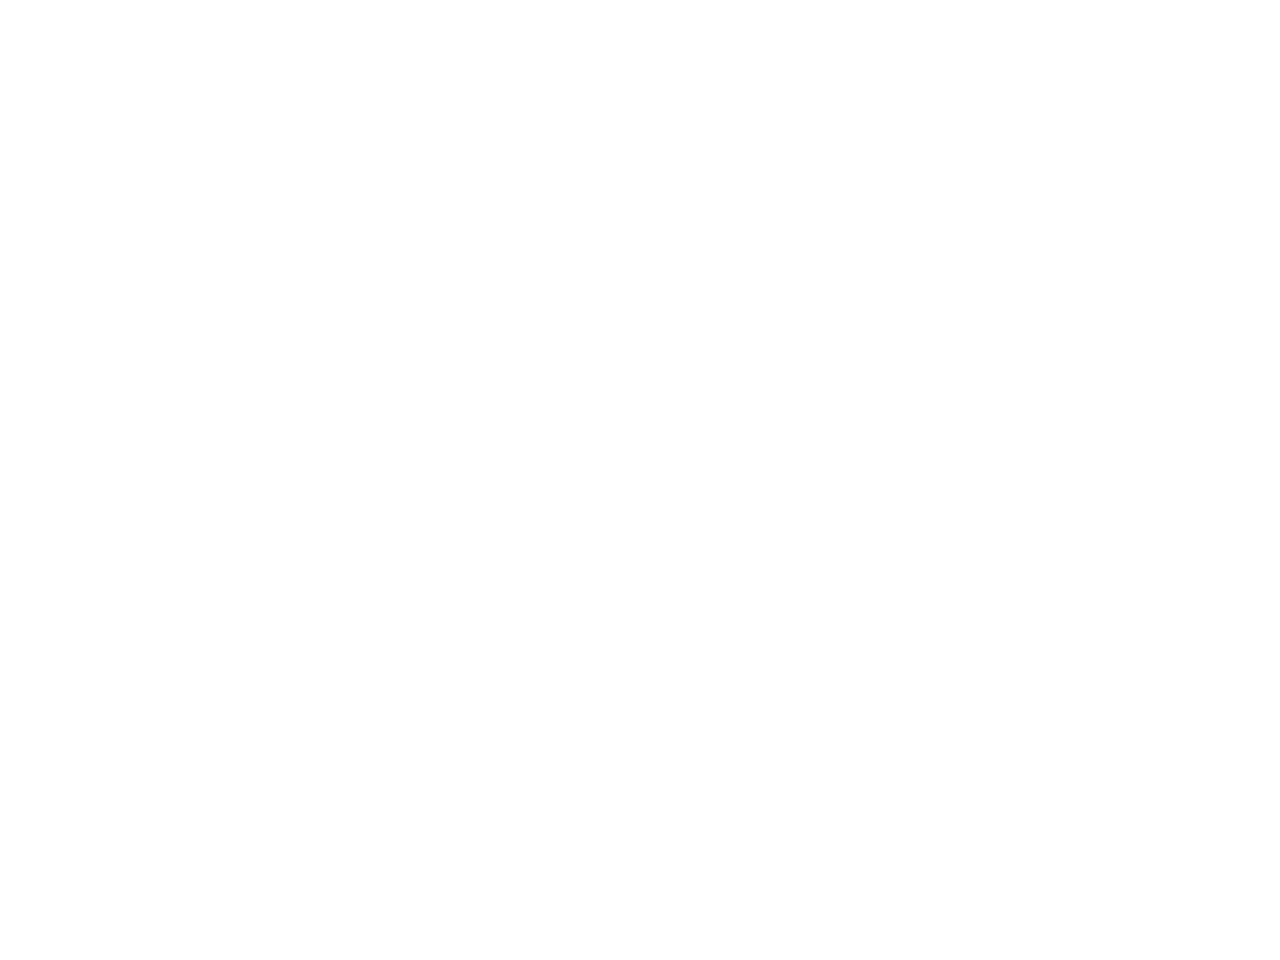

<IPython.core.display.Javascript object>


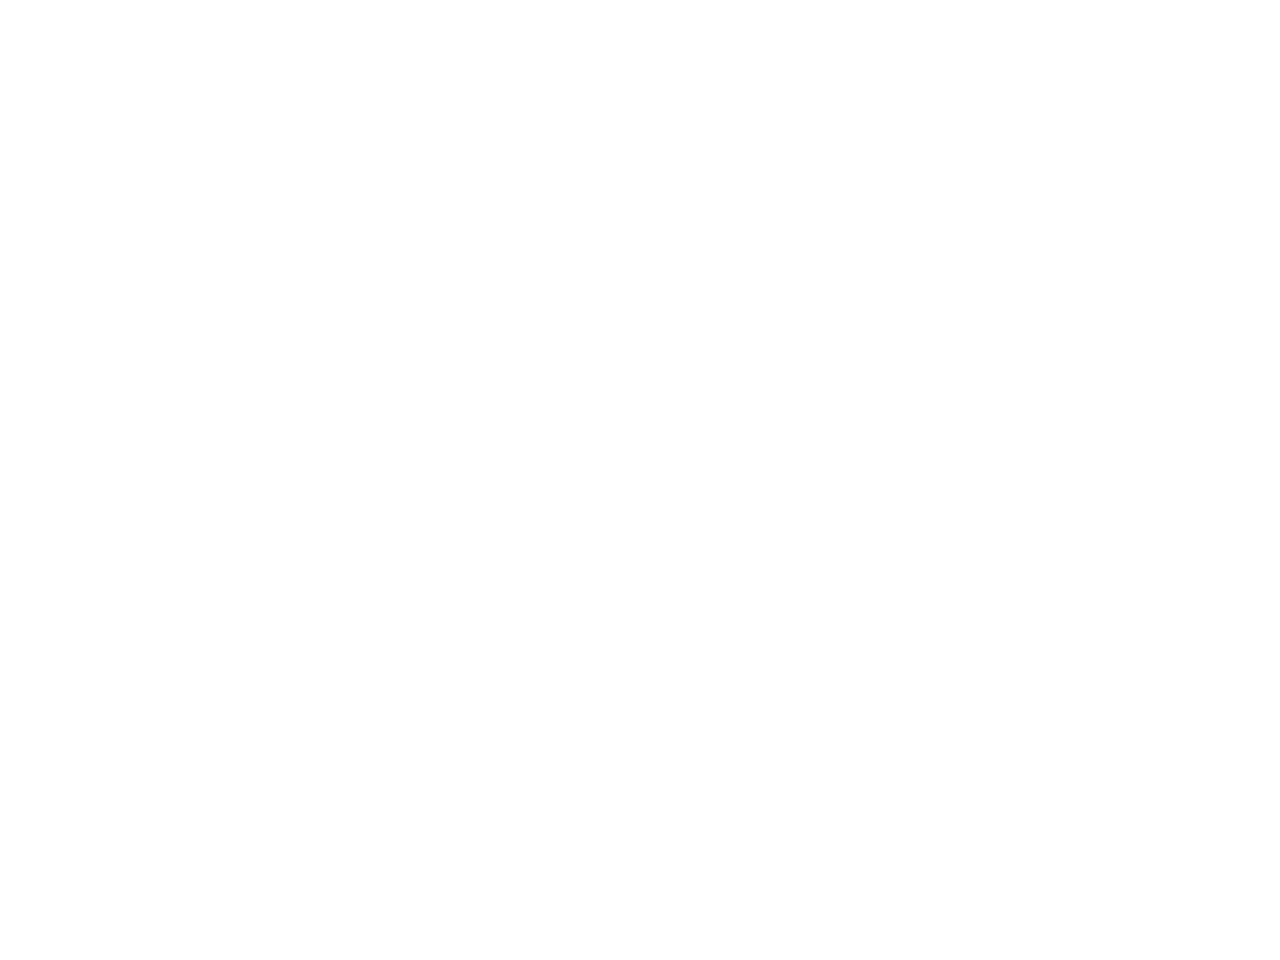

<IPython.core.display.Javascript object>


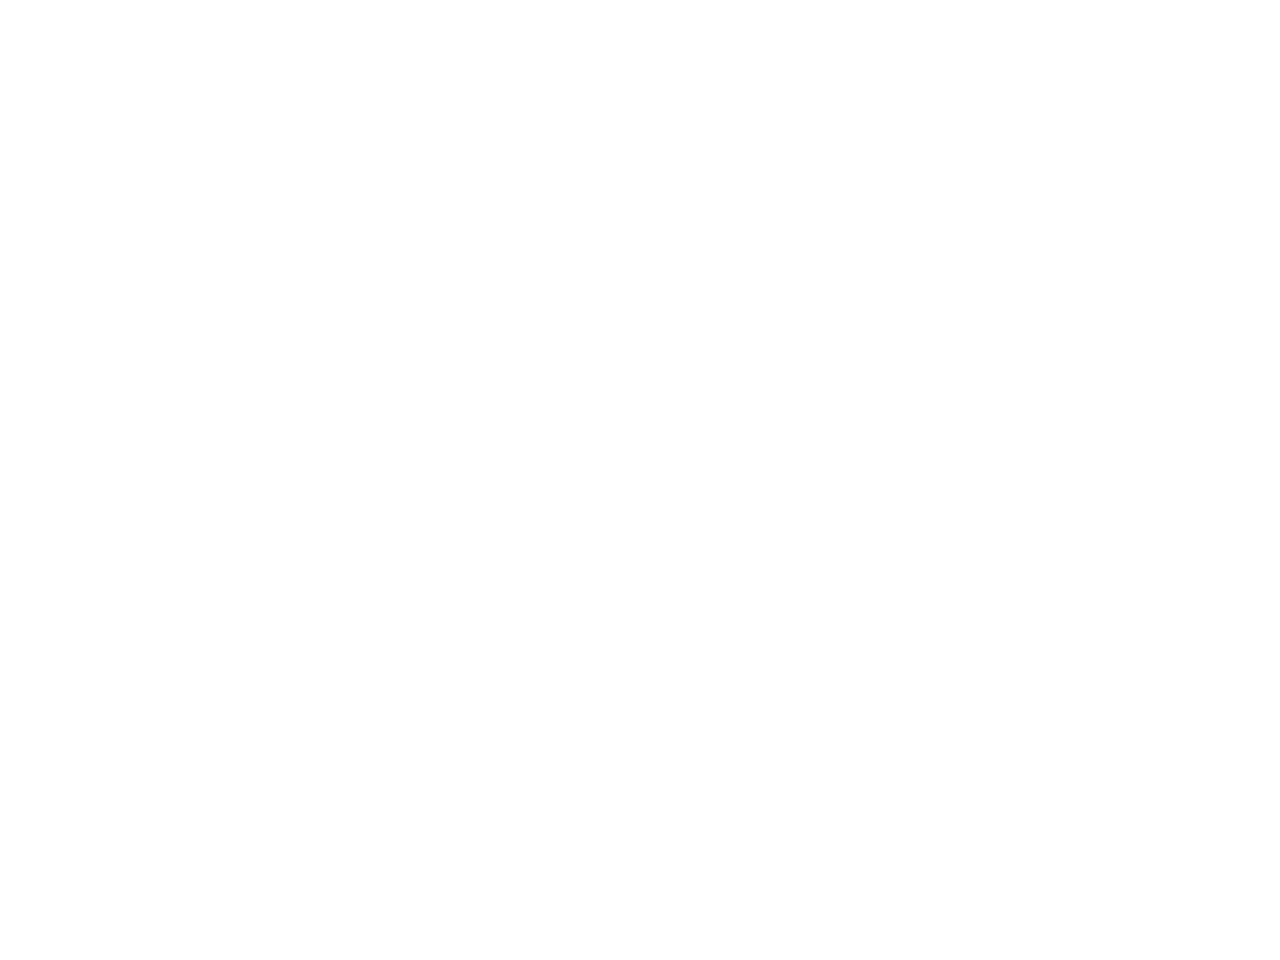

<IPython.core.display.Javascript object>


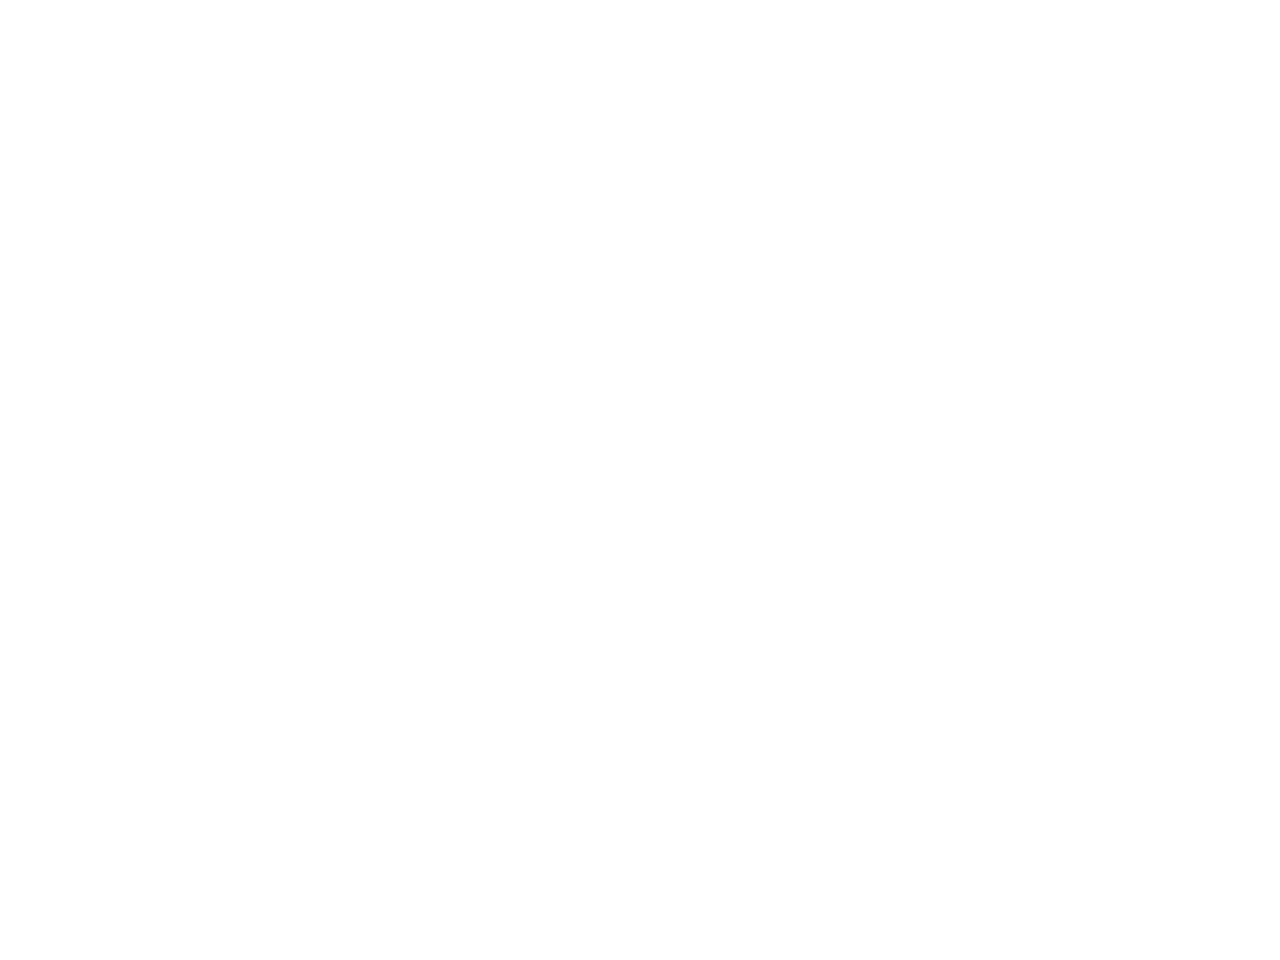

<IPython.core.display.Javascript object>


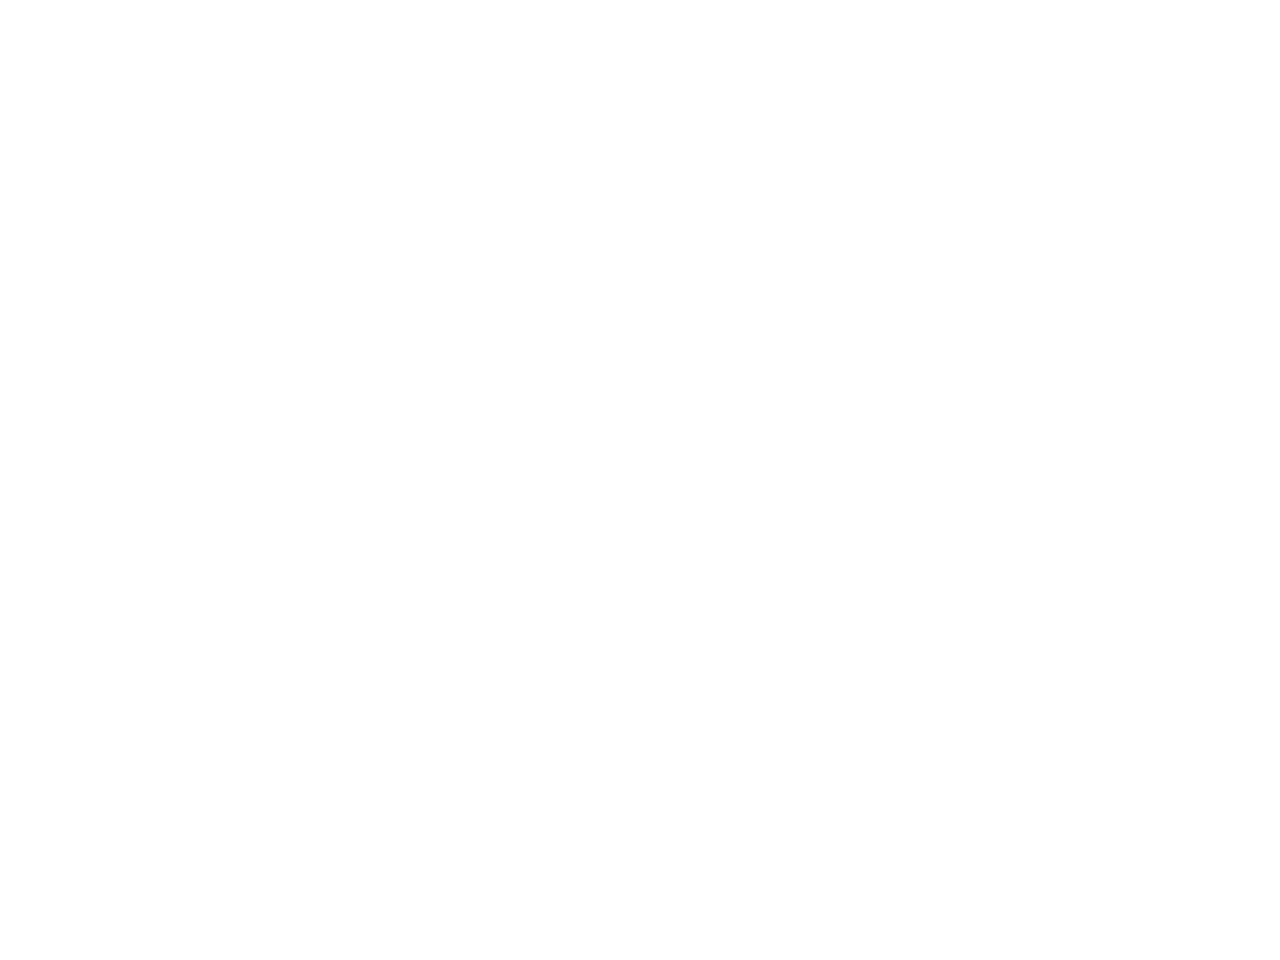

<IPython.core.display.Javascript object>


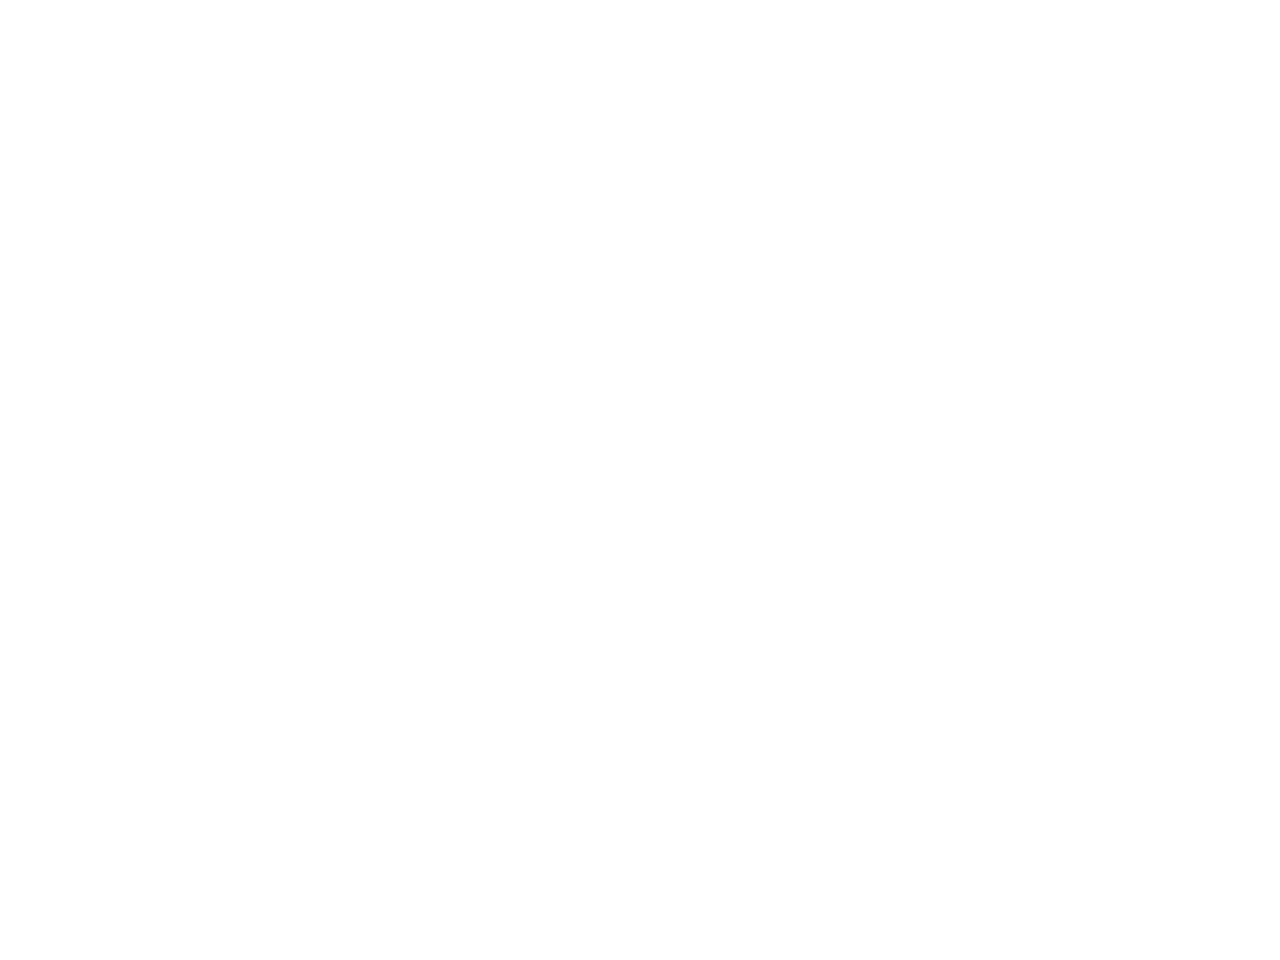

<IPython.core.display.Javascript object>


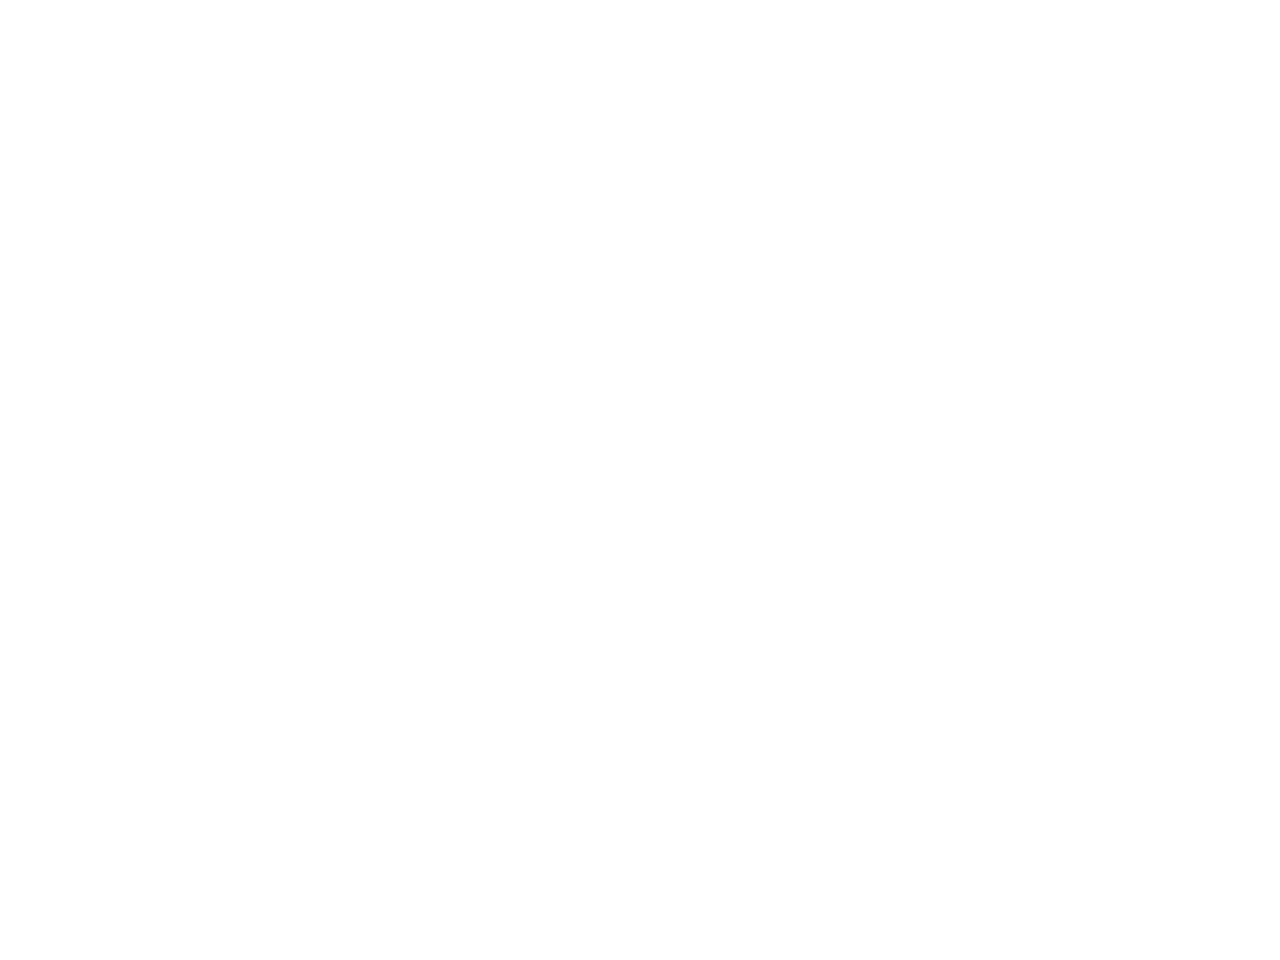

<IPython.core.display.Javascript object>


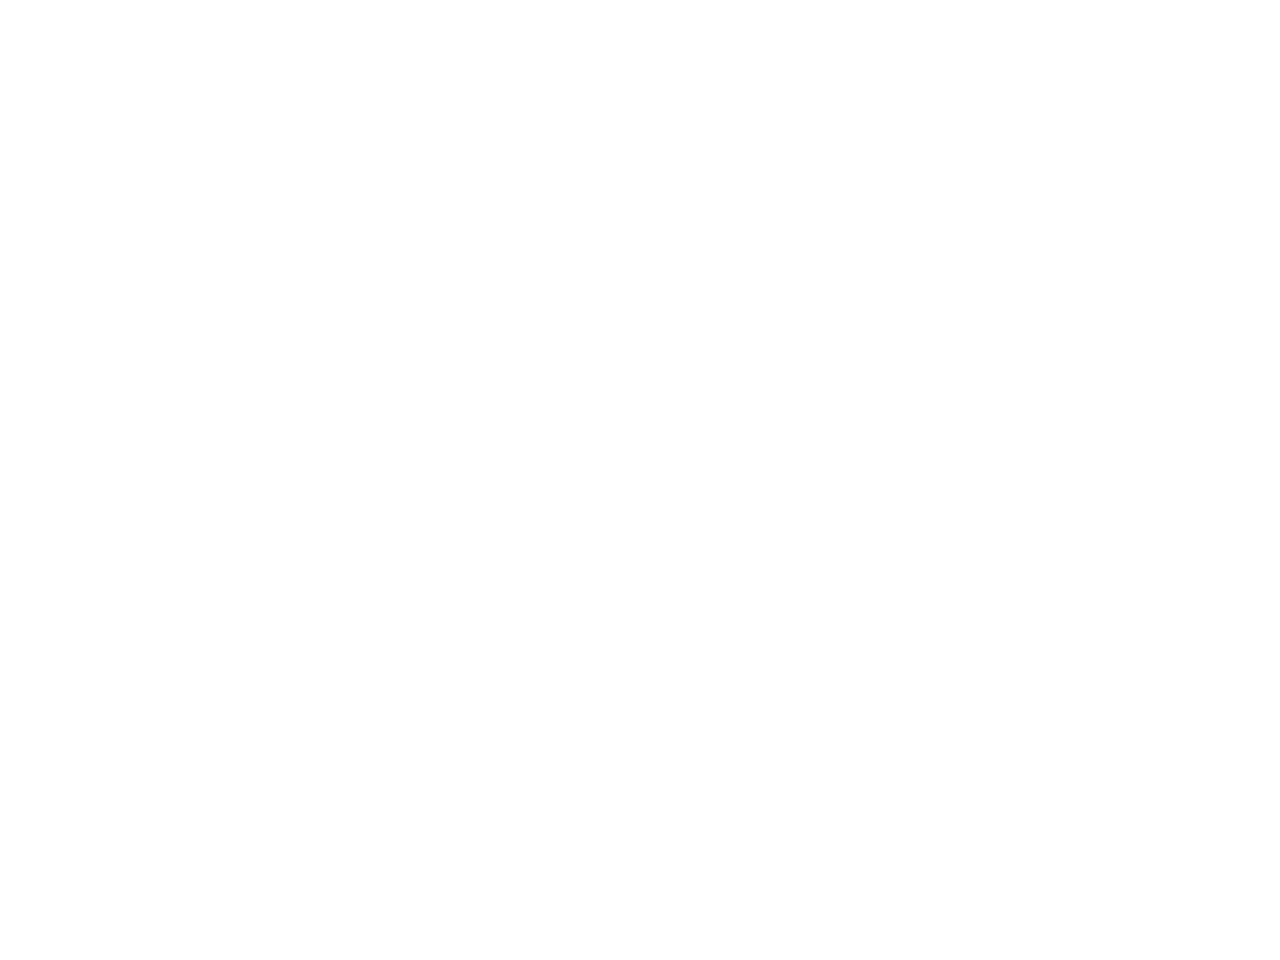

<IPython.core.display.Javascript object>


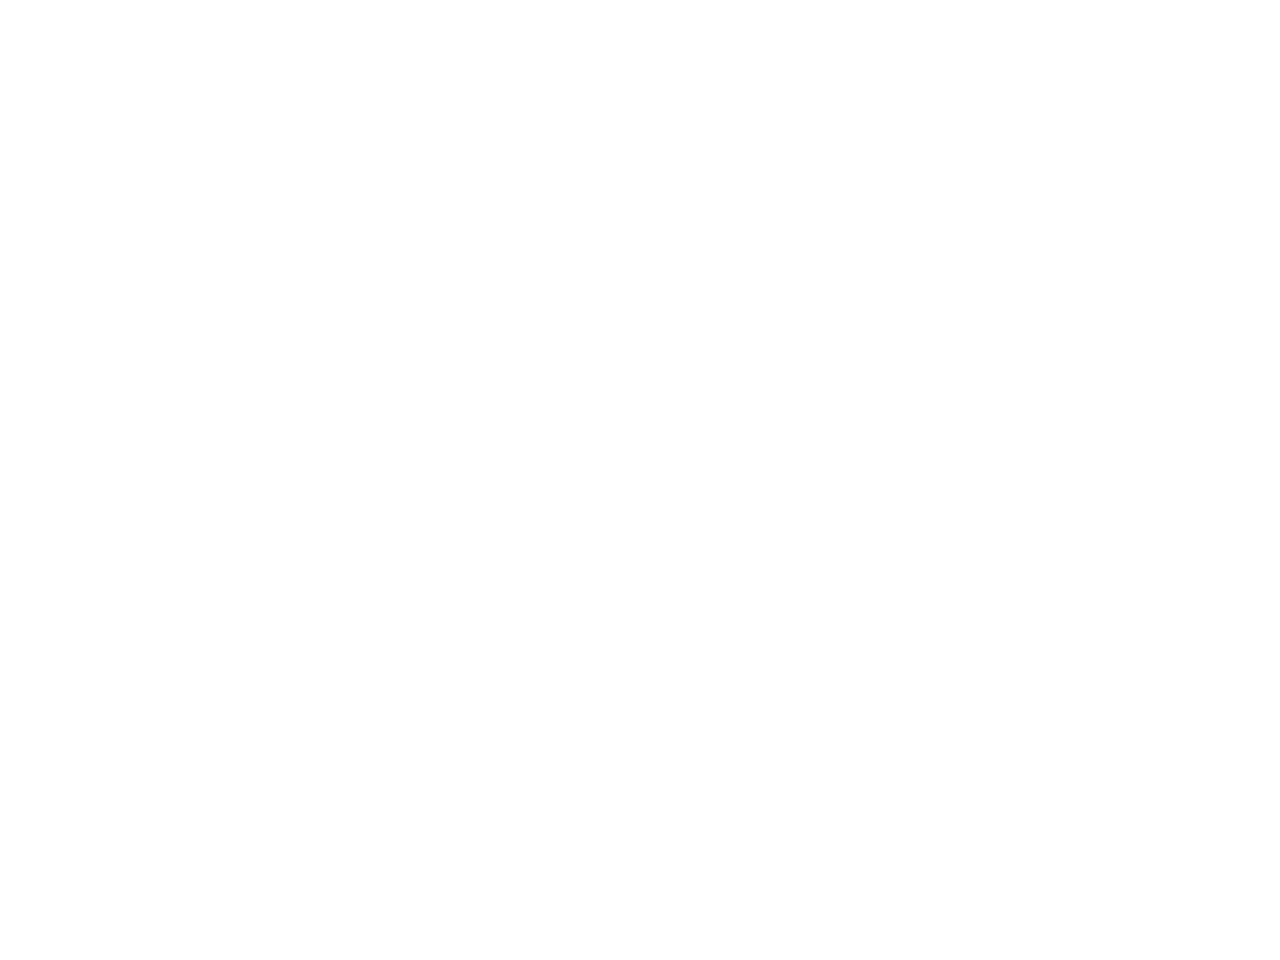

<IPython.core.display.Javascript object>


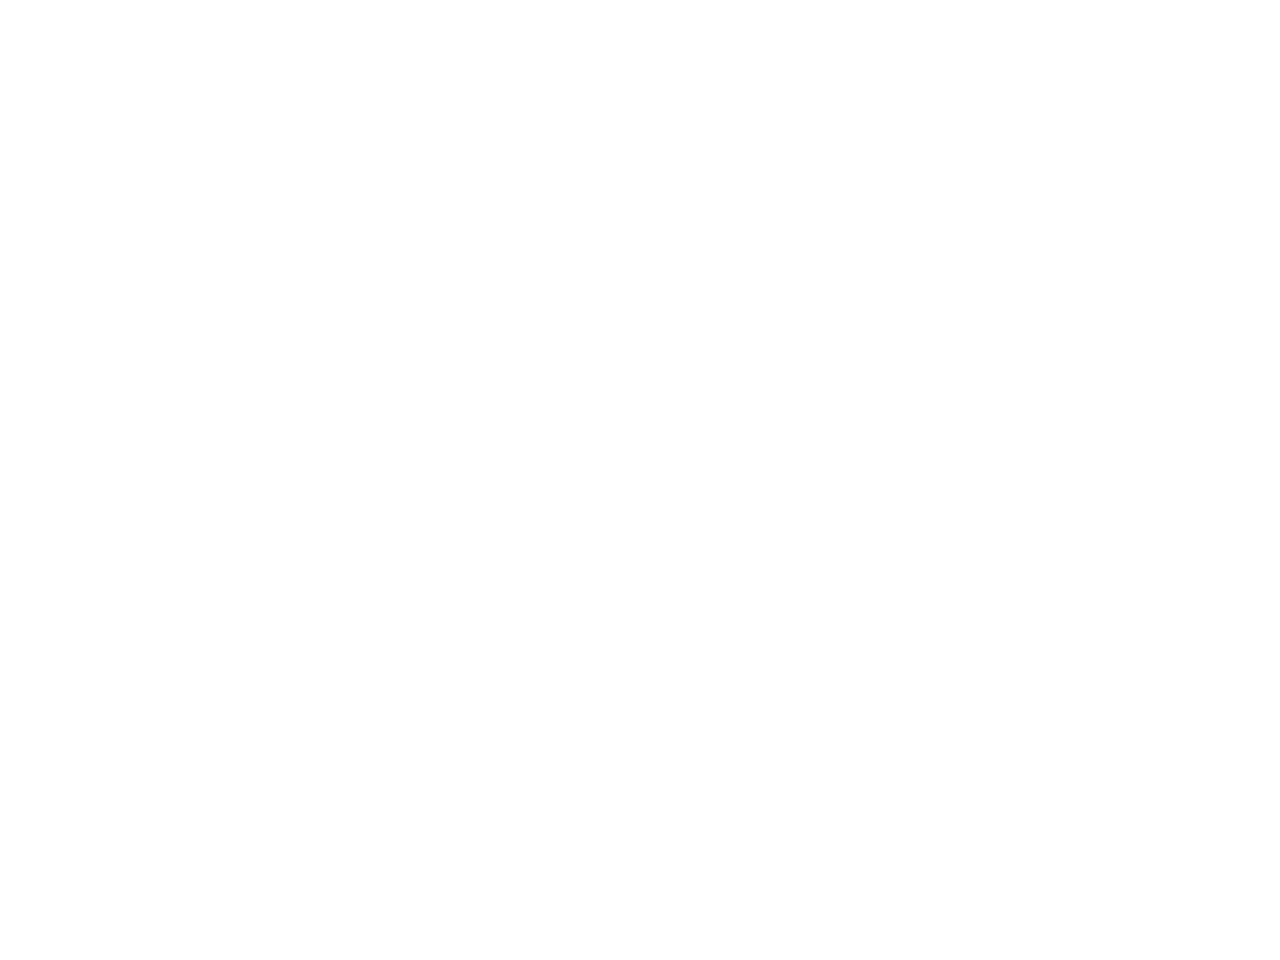

<IPython.core.display.Javascript object>


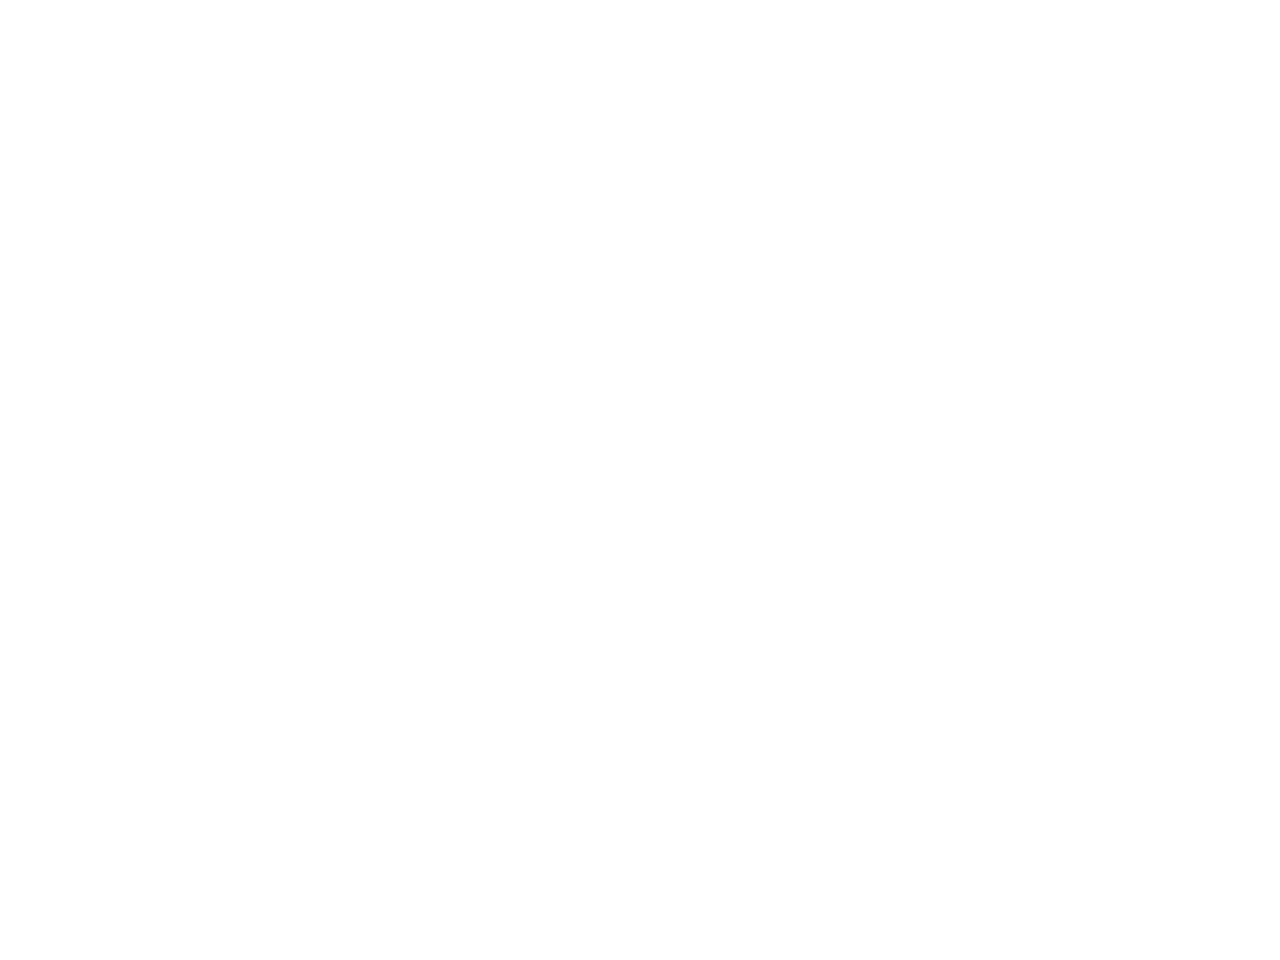

<IPython.core.display.Javascript object>


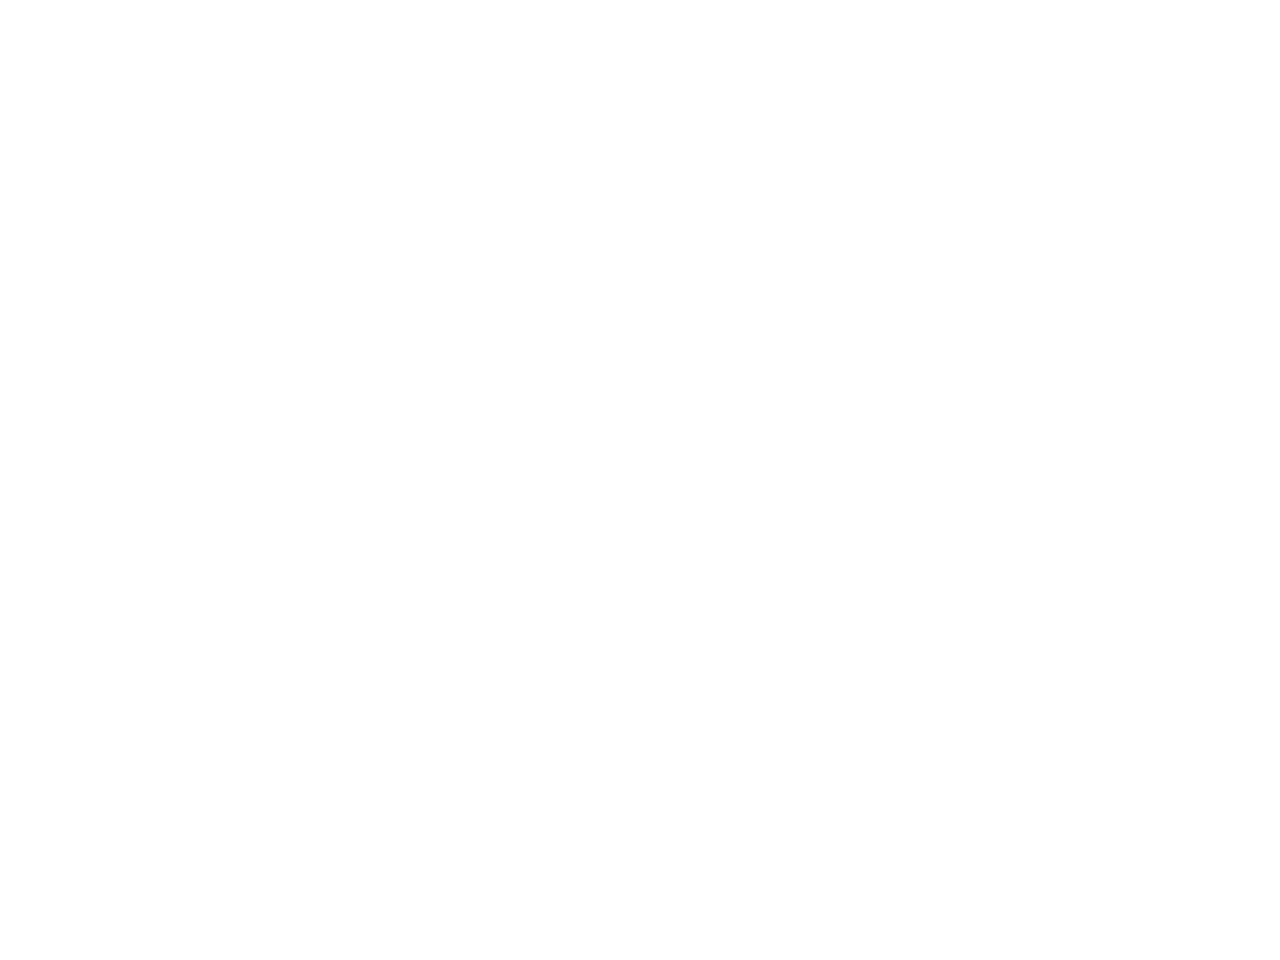

<IPython.core.display.Javascript object>


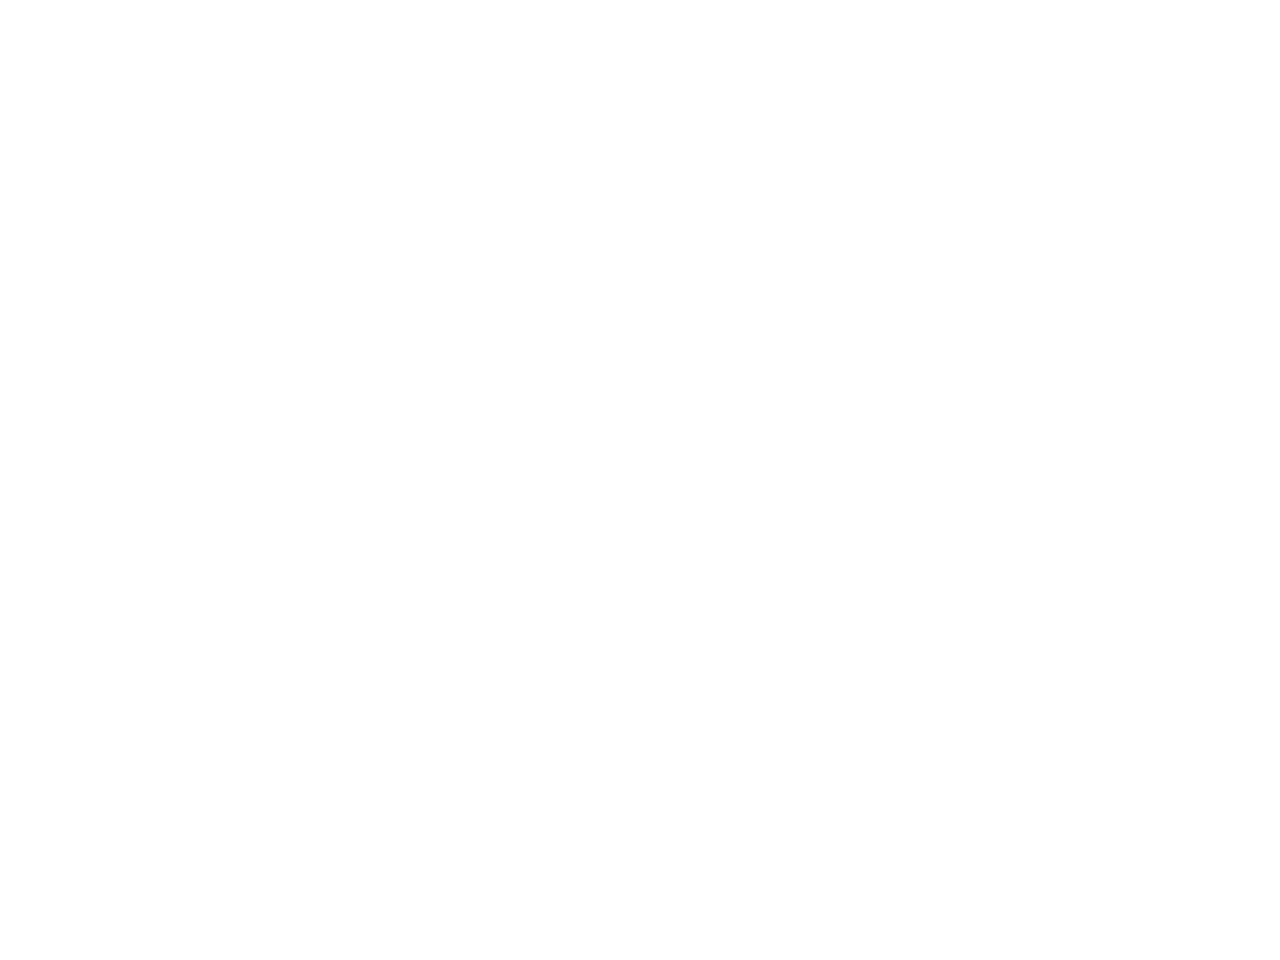

<IPython.core.display.Javascript object>


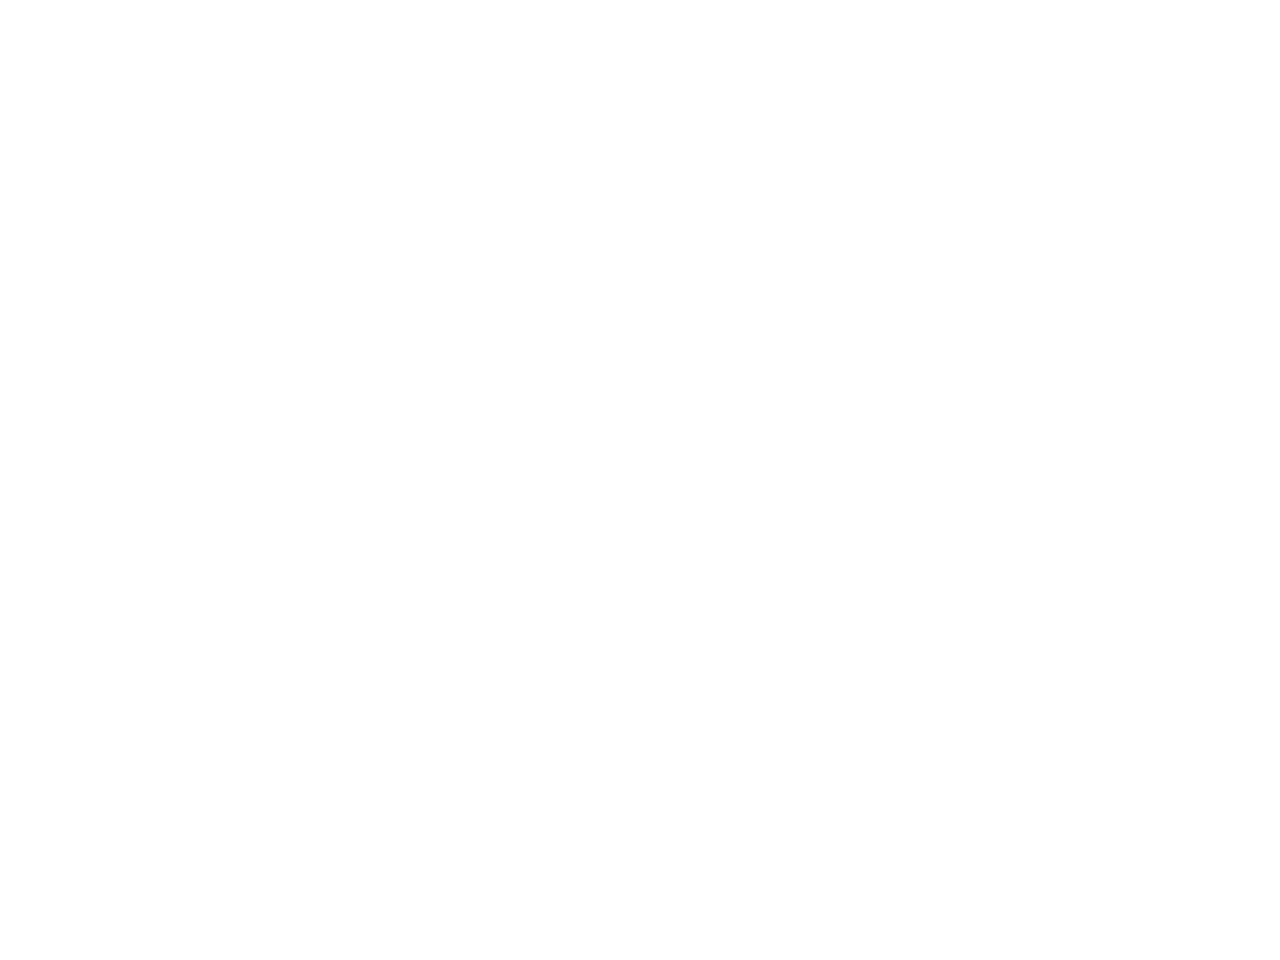

<IPython.core.display.Javascript object>


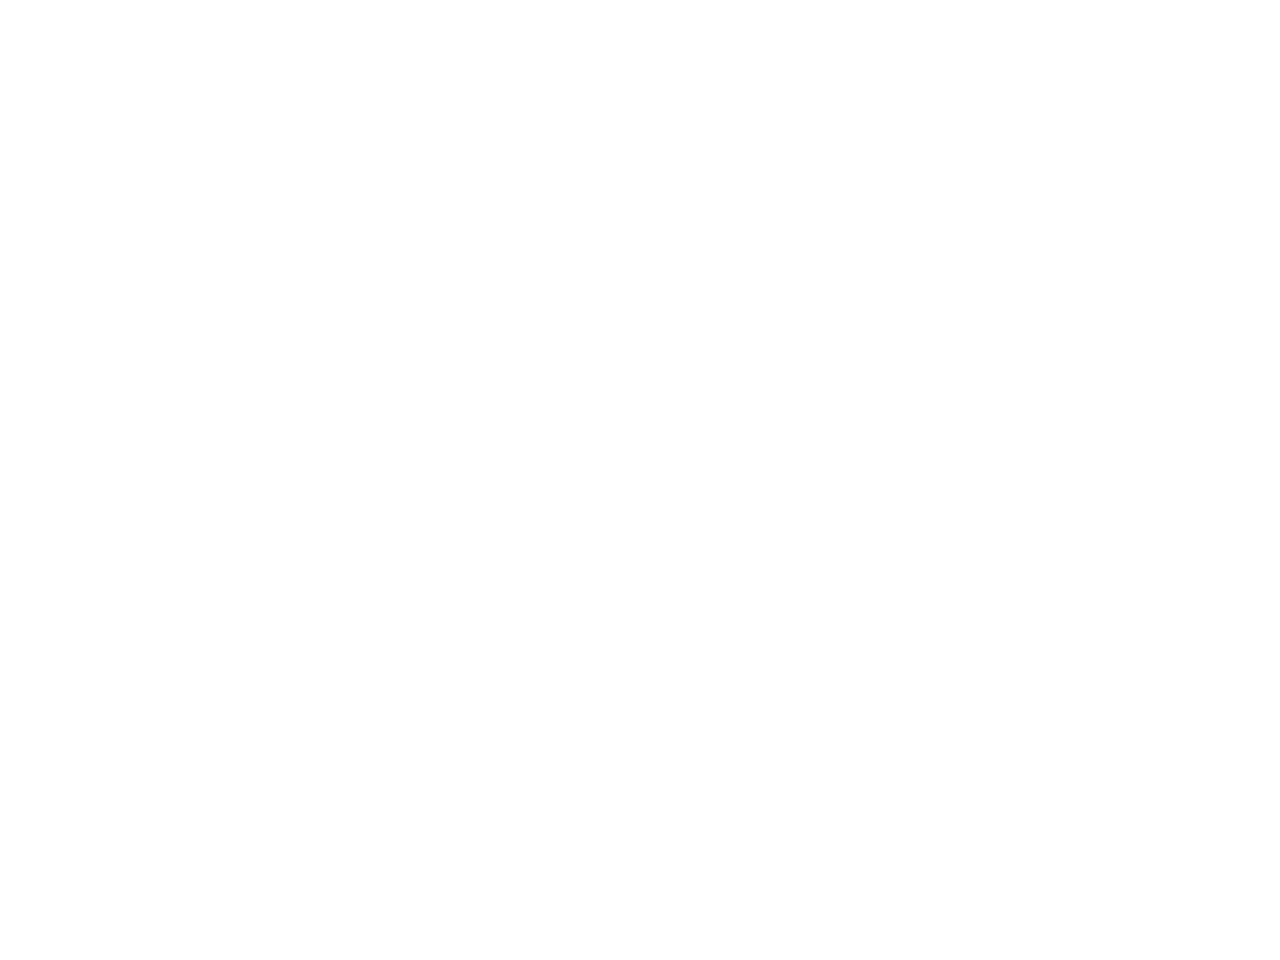

<IPython.core.display.Javascript object>


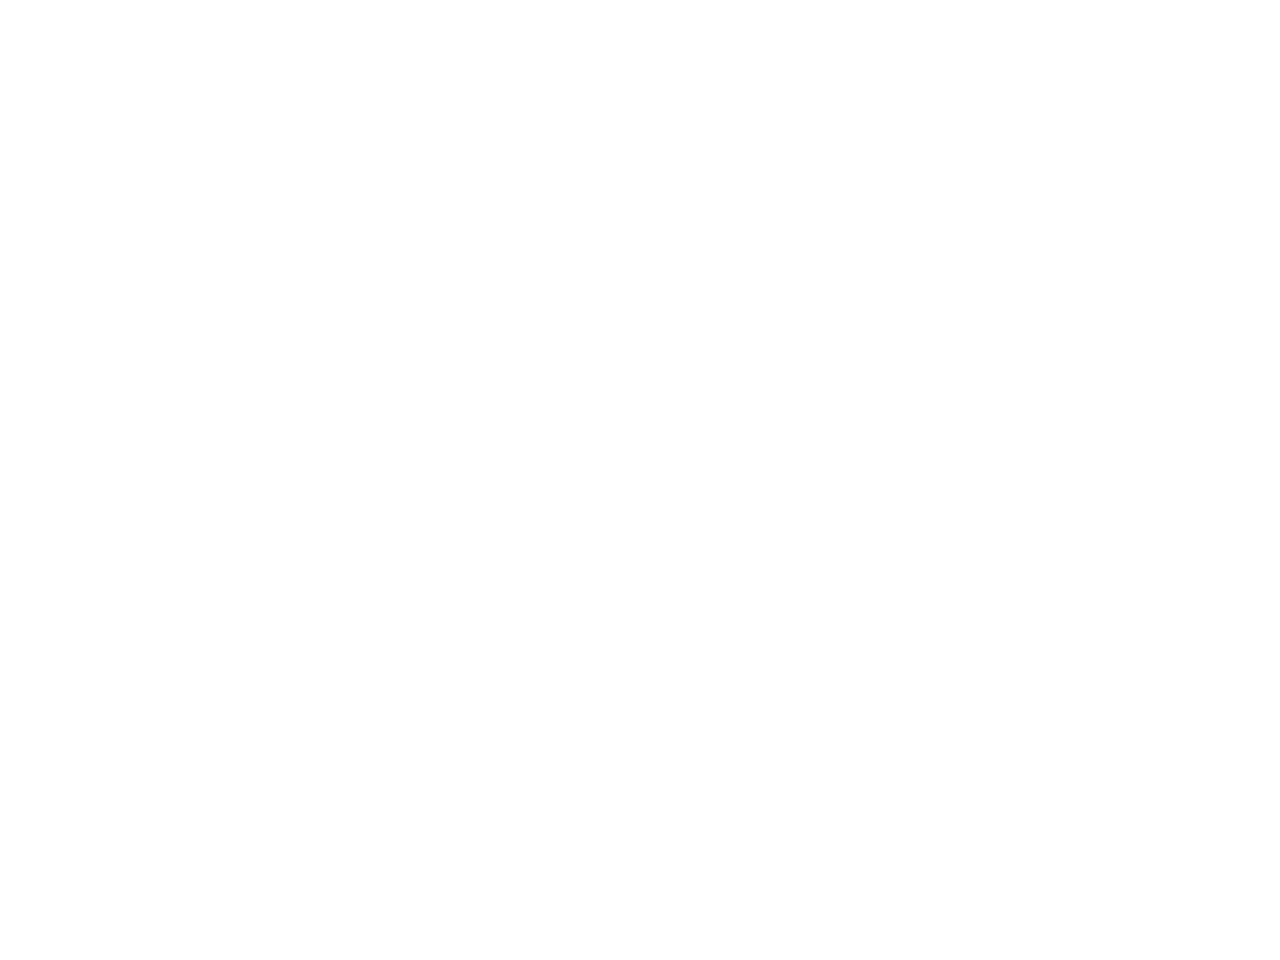

<IPython.core.display.Javascript object>


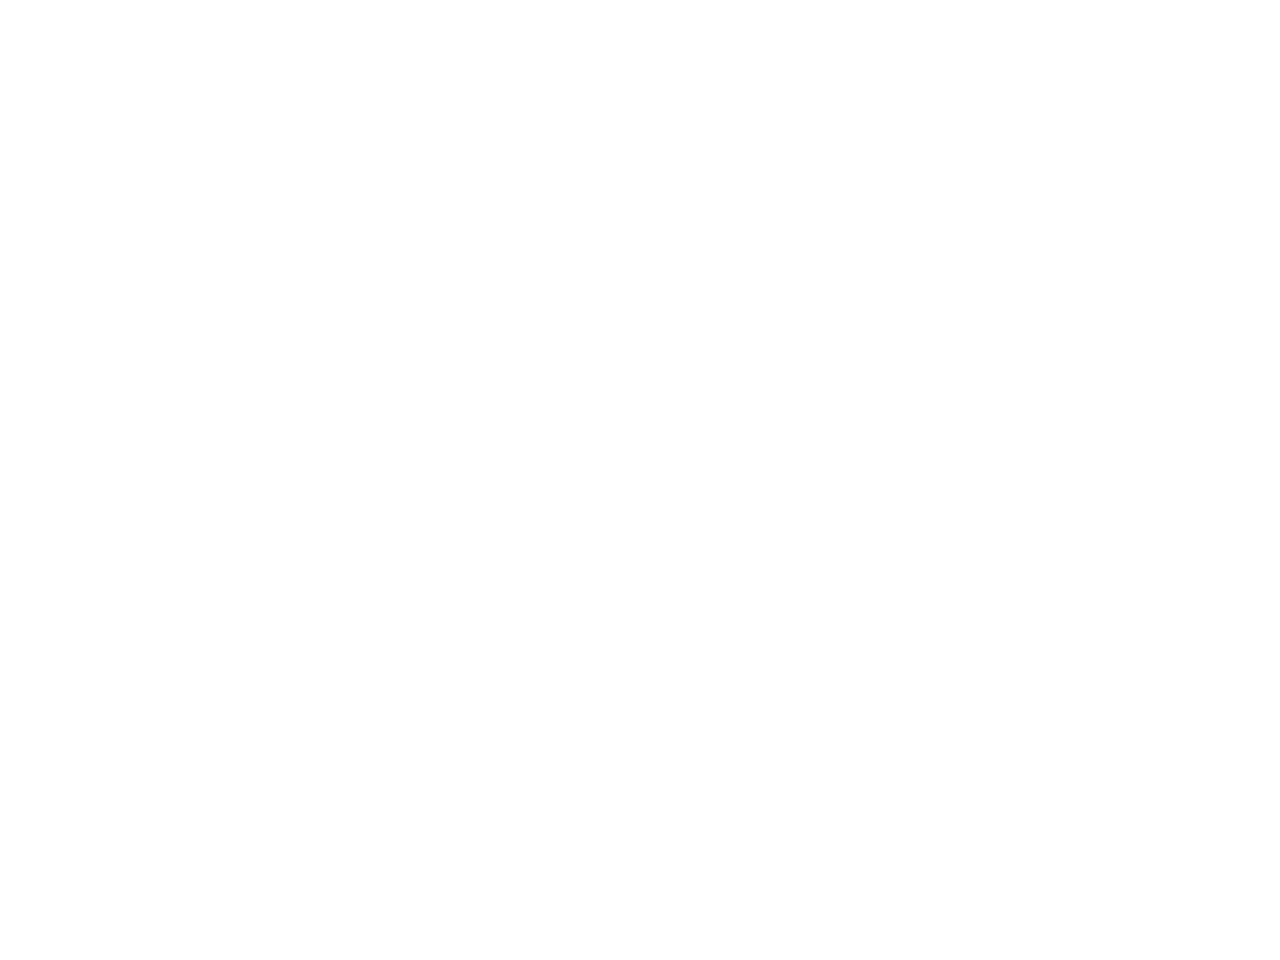

<IPython.core.display.Javascript object>


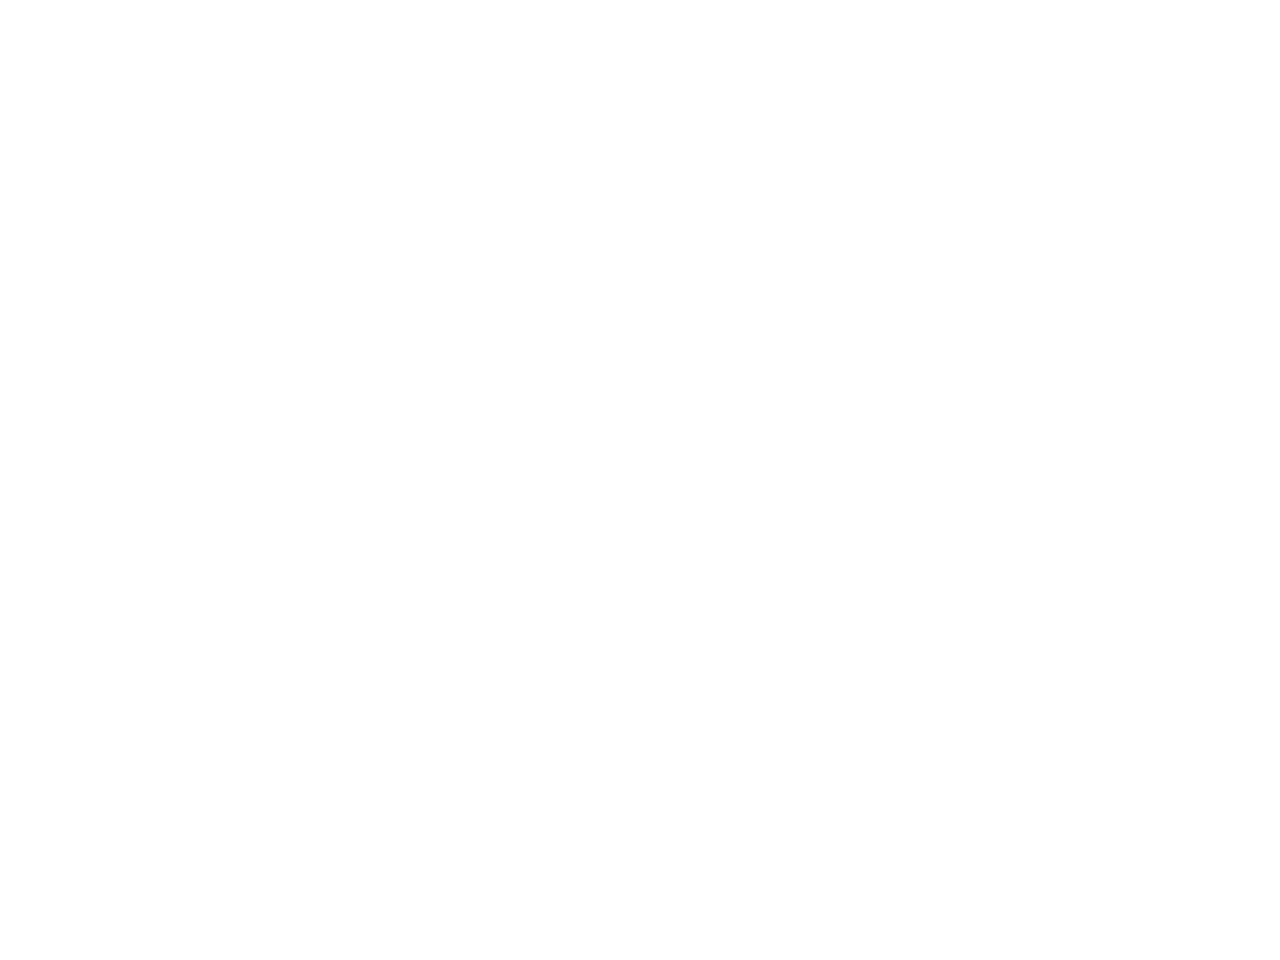

<IPython.core.display.Javascript object>


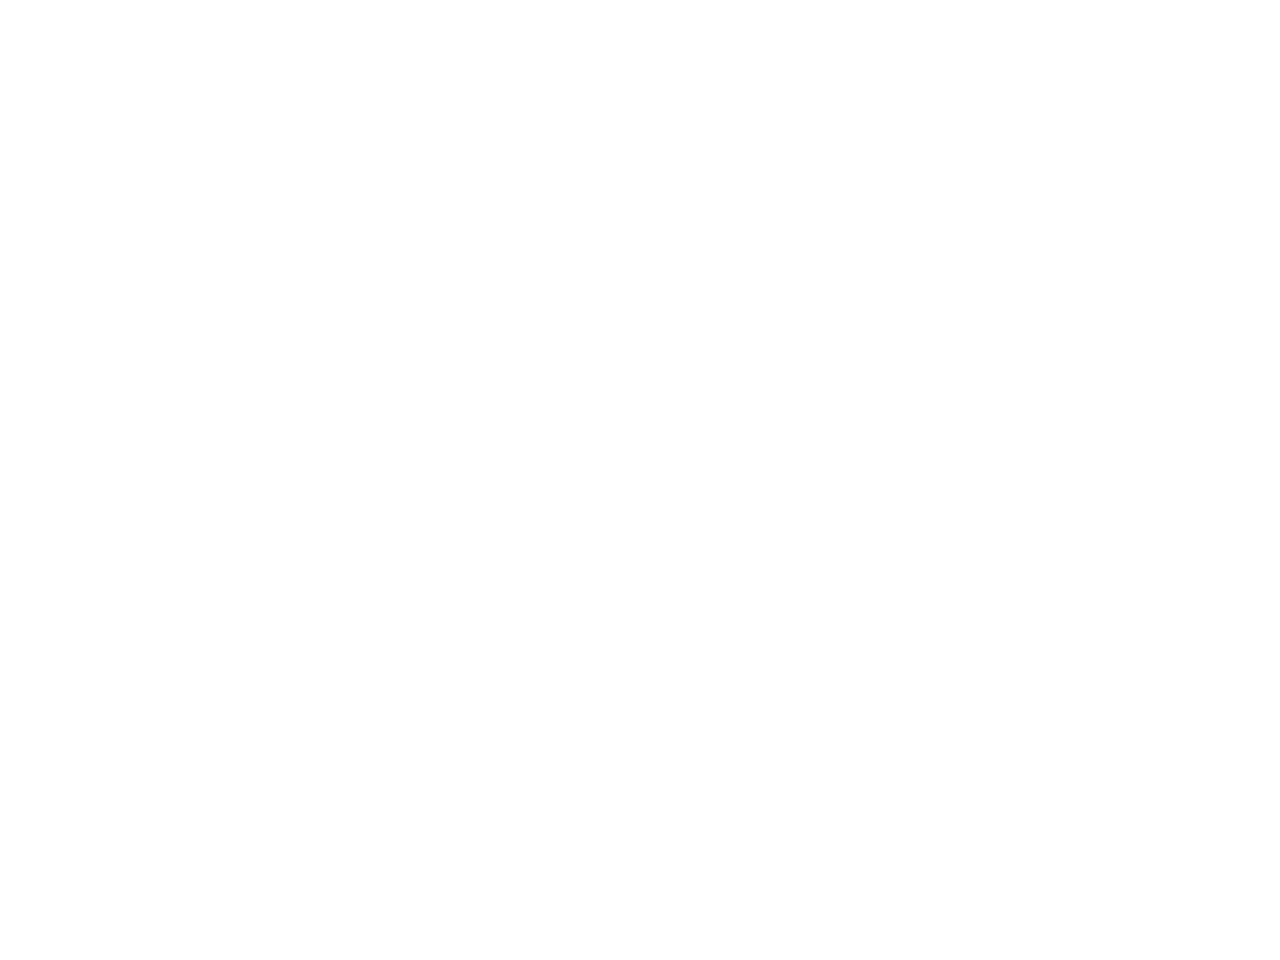

Attempting to create a symbolic link of the video ...
Symlink creation impossible (exFat architecture?): cutting/pasting the video instead.
/Users/jaanita/Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4 moved to /Users/jaanita/Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\m3v1mp4.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.


/bin/sh: mklink: command not found


In [29]:
deeplabcut.extract_outlier_frames(path_config_file,[videofile_path])

The user can run this iteratively, and (even) extract additional frames from the same video.

## Manually correct labels

This step allows the user to correct the labels in the extracted frames. Navigate to the folder corresponding to the video 'm3v1mp4' and use the GUI as described in the protocol to update the labels.

In [ ]:
import os
home = os.path.expanduser("~")
path_config_file = os.path.join(home,"Documents/GitHub/DeepLabCut/examples/openfield-Pranav-2018-10-30/config.yaml")
%pylab inline
%gui wx
deeplabcut.refine_labels(path_config_file)

In [ ]:
print("hello")

In [ ]:
#Perhaps plot the labels to see how how all the frames are annotated (including the refined ones)
deeplabcut.check_labels(path_config_file)

In [ ]:
# Now merge datasets (once you refined all frames)
deeplabcut.merge_datasets(path_config_file)

## Create a new iteration of training dataset, check it and train...

Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [ ]:
deeplabcut.create_training_dataset(path_config_file)

Now one can train the network again... (with the expanded data set)

In [ ]:
deeplabcut.train_network(path_config_file, shuffle=1)